----------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------

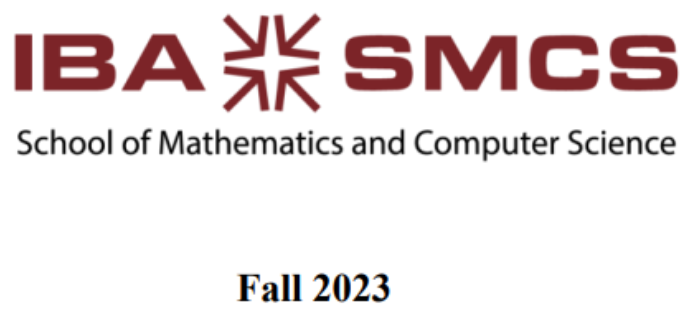

## <center> PROJECT
## <center> Course: CSF 510 DS: Application Development    
## <center> Instructor: Mr. Usman Ali

### <center> Submitted By:
#### <center> Jawad Ahmed 29423
#### <center> Muhammad Ghulam Abbas 29417
#### <center> Muhammad Uzair 29414

----------------------------------------------------------------------------------------------------------------------------

# A. SYSTEM STUDY / DOMAIN ANALYSIS

## A.1

### A.1.1 **Business Problem**

We want to explore features of patients like age, gender, eye pressure, family history, medical history, medication usage, visual test results, visual symptoms, etc., and understand glaucoma diagnoses and glaucoma types.

**Glaucoma Definition** 

Glaucoma is a group of eye diseases that can cause vision loss and blindness by damaging a nerve in the back of your eye called the optic nerve.

Reference: https://www.nei.nih.gov/learn-about-eye-health/eye-conditions-and-diseases/glaucoma

### A.1.2 **Analytics Options for Data Set and Business Process Benefits**

We can perform various types of analyses:

    Summarize and describe the characteristics of the dataset.

    Identify patterns and relationships in the data.

    Identify factors associated with different types of glaucoma.

    Suggest interventions or actions based on the analysis.

    Provide recommendations for patients with specific characteristics.

    Identify potential risk factors and preventive measures.

    Identify outliers and anomalies.

    Understand feature distributions.

This analysis can be useful for glaucoma detection and diagnosis. Insights gained from the analytics can inform medical practitioners, researchers, and healthcare professionals in understanding patterns, making informed decisions, and improving patient outcomes.

### A.1.3 **Motivation**

##### **76 Billion people worldwide are affected by Glaucoma that can cause vision impairment.**

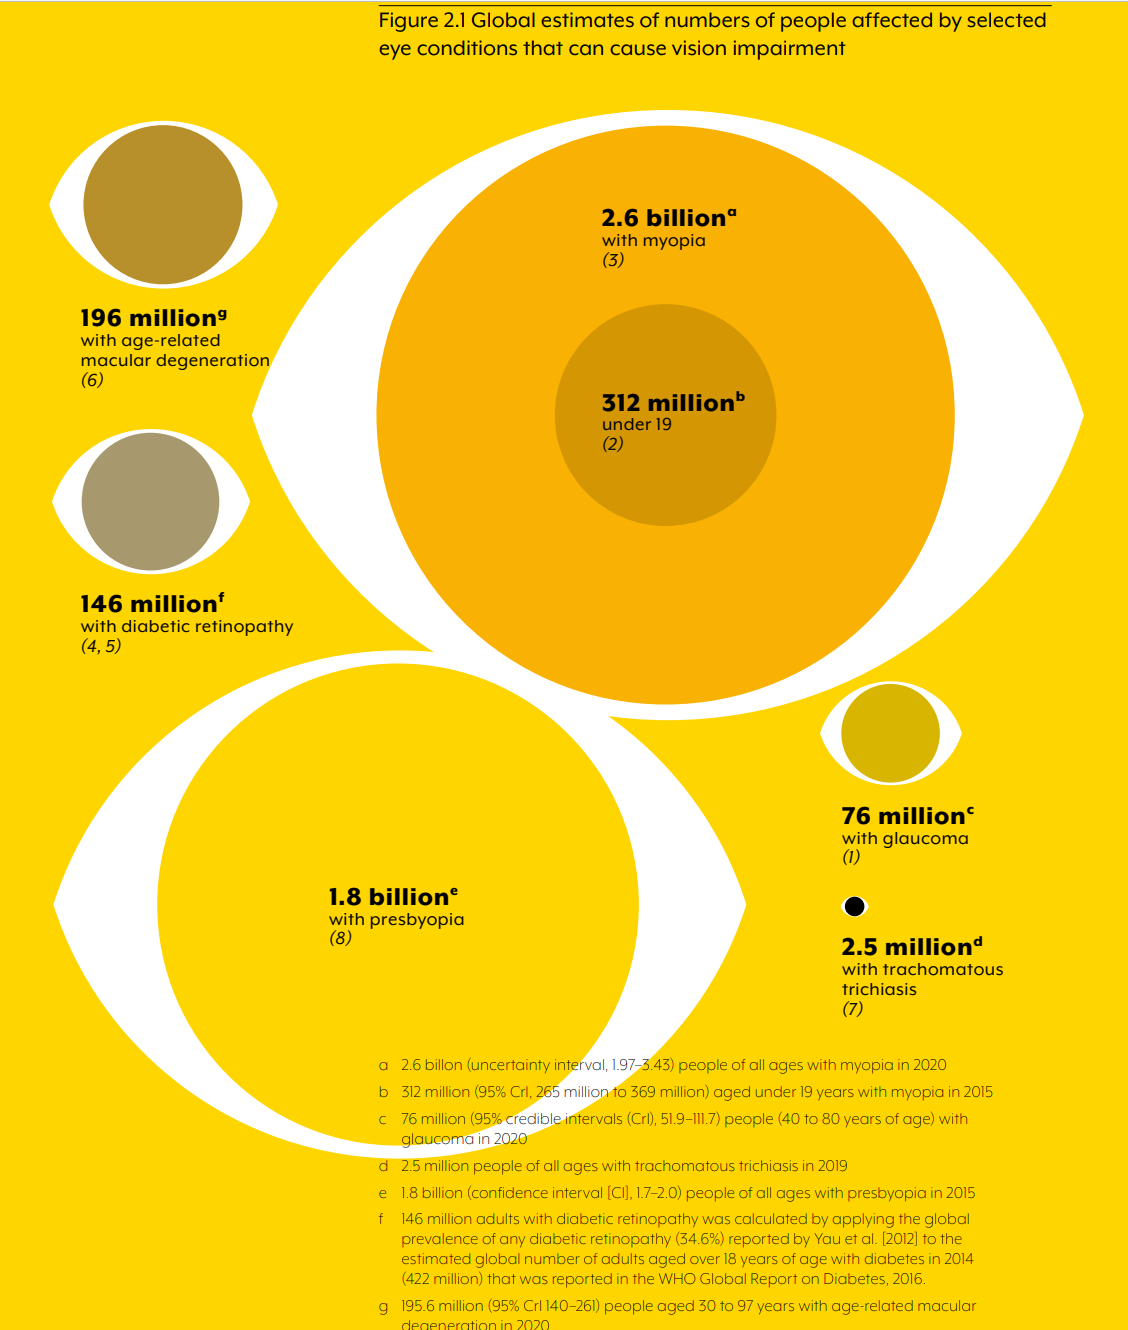

##### **6.9 Million people could have been prevented from getting Glaucoma, or have yet to be addressed.**

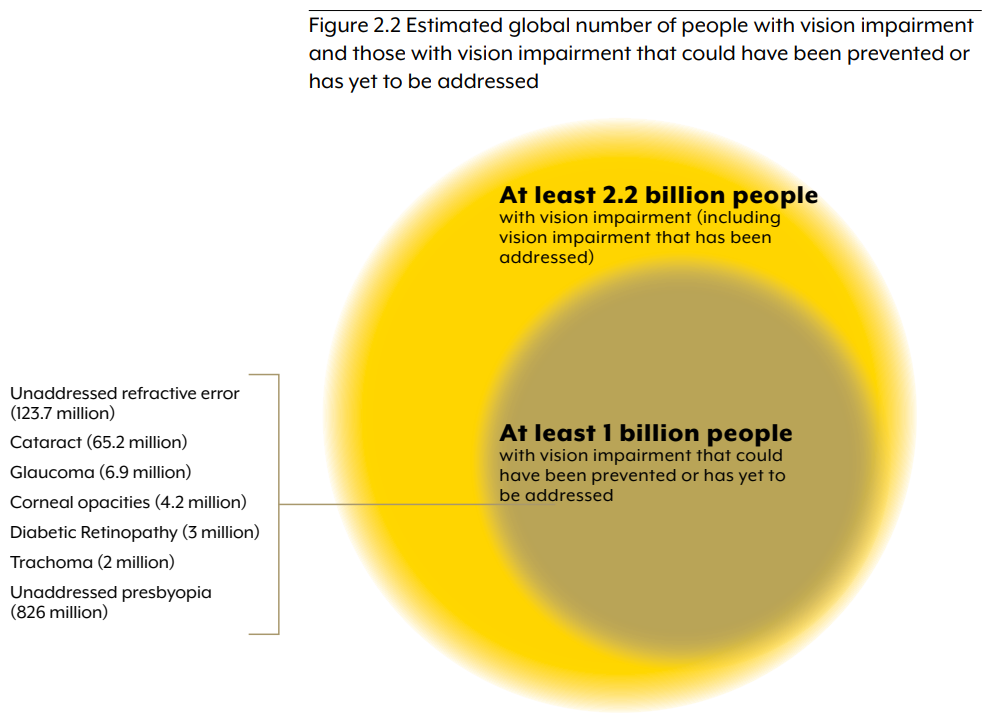

##### **It is projected that by 2030, 95.4 Million people will be affected by Glaucoma.**

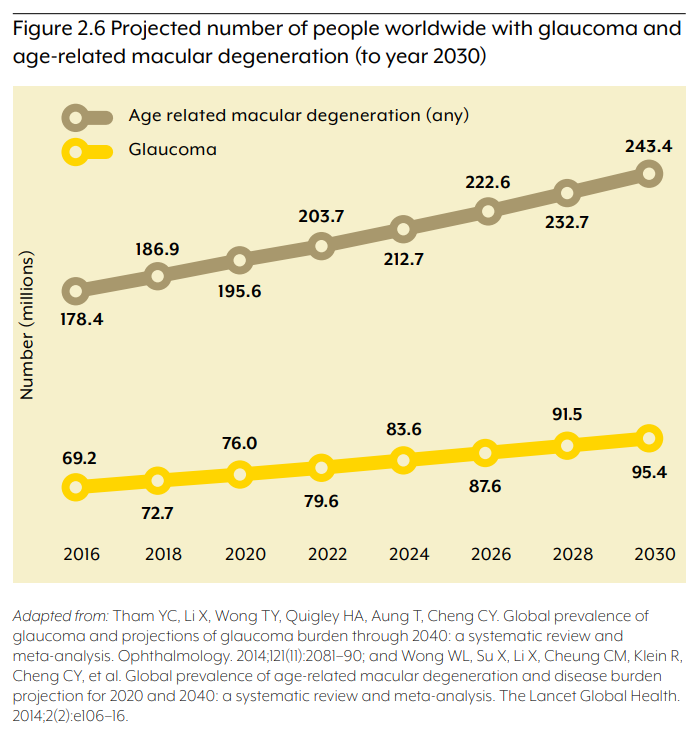

Reference: https://www.who.int/publications/i/item/9789241516570

## A.2

**Dataset**

We have chosen a dataset from Kaggle. The title is 'Glaucoma Detection Dataset'. The data is provided by incribo.com.

Reference: https://www.kaggle.com/datasets/teamincribo/glaucoma-detection-dataset

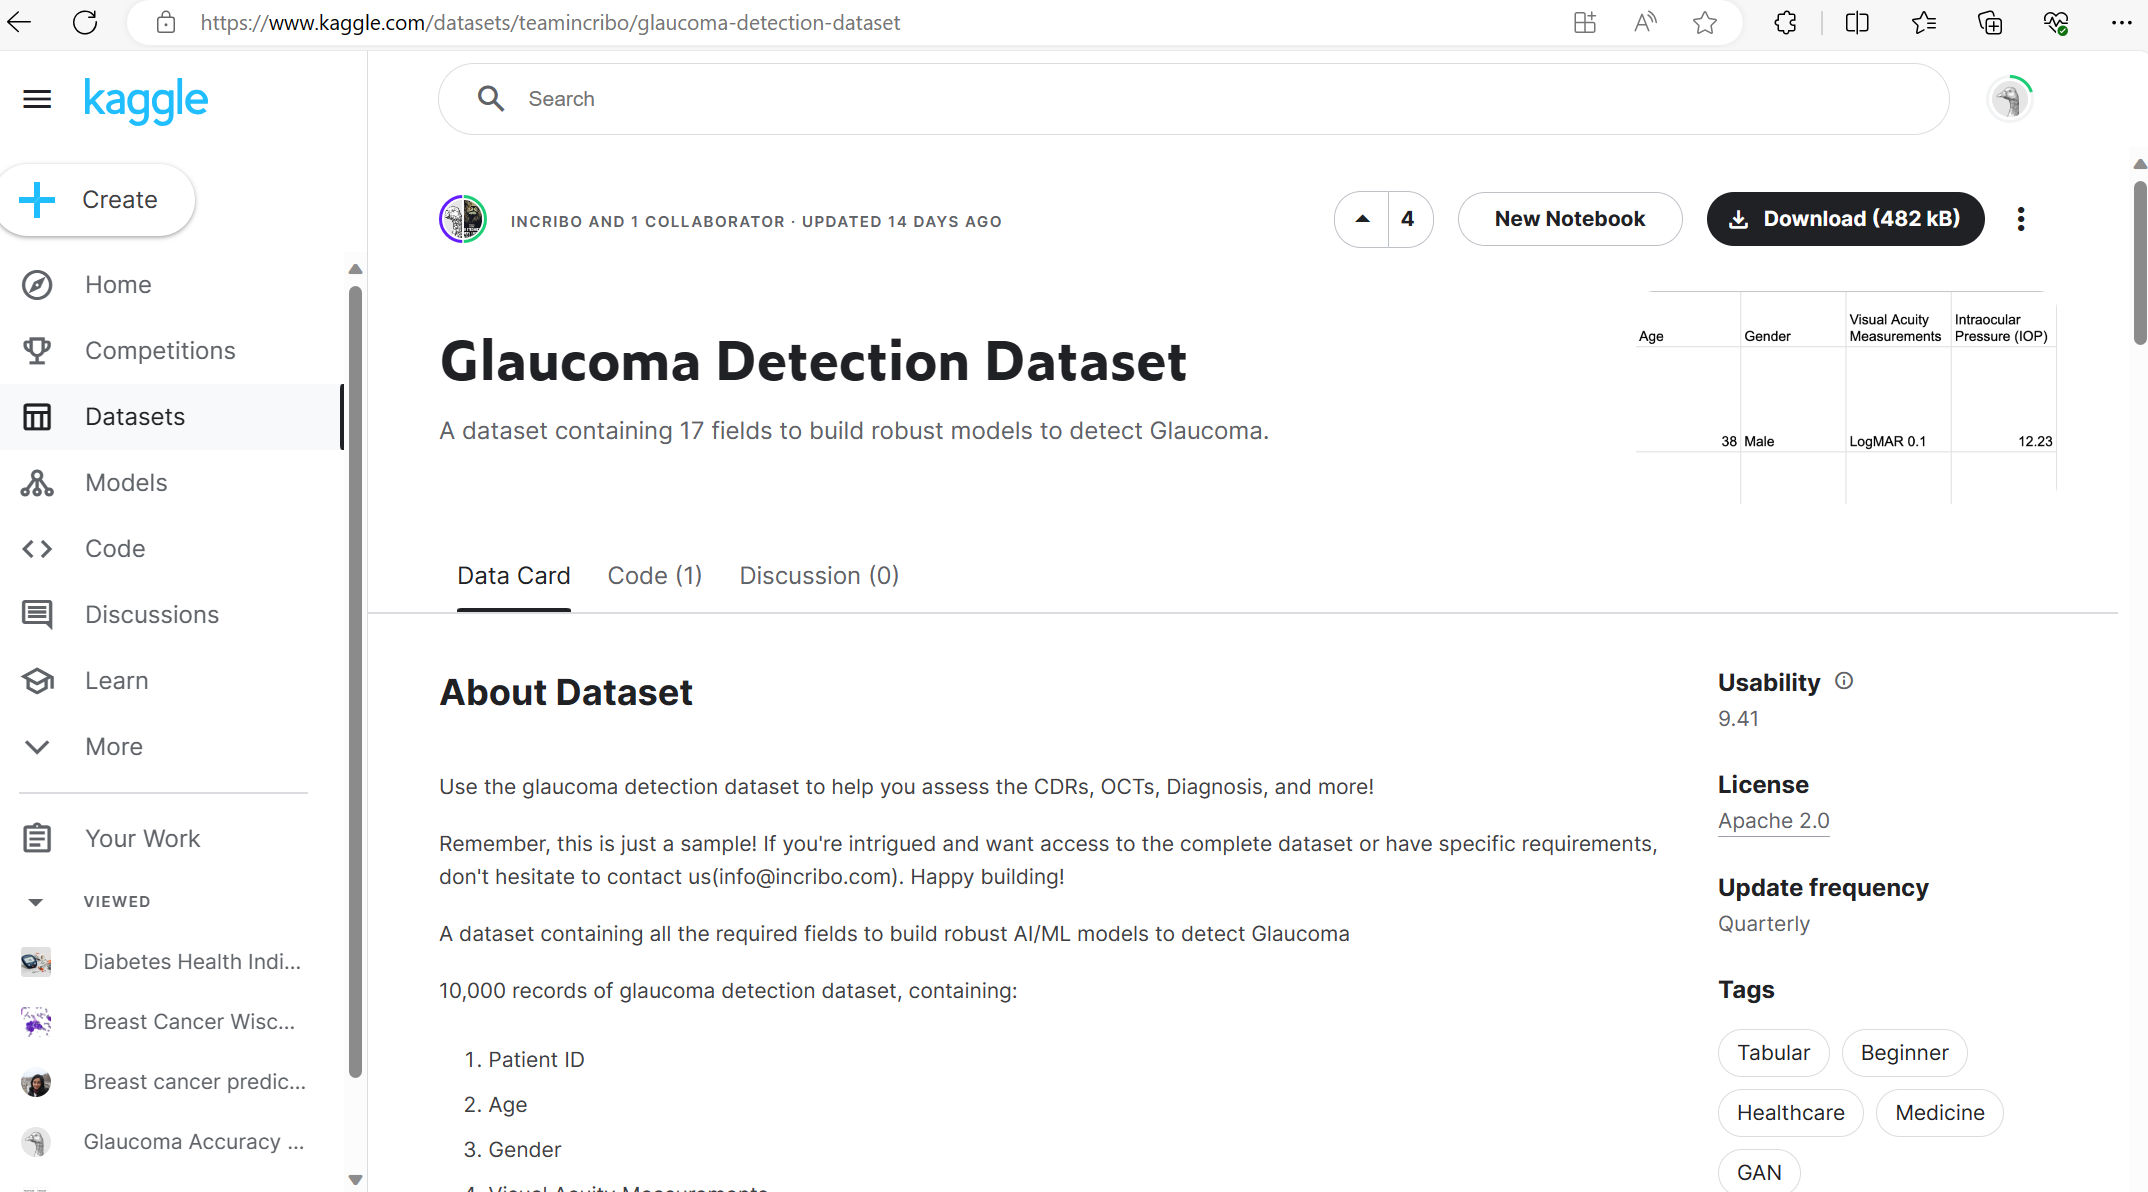

**Data Inspection / Exploration**

In [1]:
import pandas as pd
import numpy as np

file_path= 'datasets\glaucoma_dataset.csv'

In [2]:
# this is a dataframe which we will not touch
df_original = pd.read_csv(file_path)

In [3]:
# this is the dataframe which we will clean
df = pd.read_csv(file_path)

df.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,56563,18,Female,20/20,11.69,0.36,Yes,Diabetes,"Amoxicillin, Aspirin, Ibuprofen, Atorvastatin,...","Sensitivity: 0.54, Specificity: 0.72","RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",500.99,Absent,Closed,"Halos around lights, Halos around lights, Visi...",No Glaucoma,No Glaucoma
1,56070,18,Female,LogMAR 0.0,11.71,0.36,Yes,Diabetes,"Amoxicillin, Atorvastatin, Metformin","Sensitivity: 0.91, Specificity: 0.82","RNFL Thickness: 79.39 µm, GCC Thickness: 63.65...",500.81,Absent,Closed,"Vision loss, Halos around lights, Redness in t...",No Glaucoma,No Glaucoma
2,83509,18,Female,LogMAR 0.1,17.28,0.54,Yes,Diabetes,"Metformin, Ibuprofen, Aspirin, Omeprazole","Sensitivity: 0.95, Specificity: 0.93","RNFL Thickness: 83.64 µm, GCC Thickness: 59.38...",500.79,Absent,Open,"Vision loss, Tunnel vision, Tunnel vision",No Glaucoma,No Glaucoma
3,16587,18,Female,20/40,15.79,0.49,No,Diabetes,"Ibuprofen, Lisinopril, Atorvastatin","Sensitivity: 0.79, Specificity: 0.72","RNFL Thickness: 78.43 µm, GCC Thickness: 62.77...",500.77,Present,Closed,"Blurred vision, Redness in the eye, Vomiting",No Glaucoma,No Glaucoma
4,60222,18,Female,LogMAR 0.0,10.31,0.31,Yes,Diabetes,"Atorvastatin, Aspirin","Sensitivity: 0.53, Specificity: 0.77","RNFL Thickness: 79.11 µm, GCC Thickness: 62.94...",500.77,Present,Closed,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,No Glaucoma


### A.2.a **Dataset Type**

This dataset is suitable for **classification** tasks.

It involves predicting the class (i.e. presence or absence of glaucoma) based on various features.

### A.2.b **Class Balance**

In [4]:
df['Diagnosis'].value_counts(normalize=True) * 100

Glaucoma       50.12
No Glaucoma    49.88
Name: Diagnosis, dtype: float64

Hence, our dataset is almost balanced for prediciting Galucoma.

If the dataset is not balanced, the ML algorithm can be biased.

### A.2.c **Data Composition**

**First Five Rows of Data**

In [5]:
df.head()

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,56563,18,Female,20/20,11.69,0.36,Yes,Diabetes,"Amoxicillin, Aspirin, Ibuprofen, Atorvastatin,...","Sensitivity: 0.54, Specificity: 0.72","RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",500.99,Absent,Closed,"Halos around lights, Halos around lights, Visi...",No Glaucoma,No Glaucoma
1,56070,18,Female,LogMAR 0.0,11.71,0.36,Yes,Diabetes,"Amoxicillin, Atorvastatin, Metformin","Sensitivity: 0.91, Specificity: 0.82","RNFL Thickness: 79.39 µm, GCC Thickness: 63.65...",500.81,Absent,Closed,"Vision loss, Halos around lights, Redness in t...",No Glaucoma,No Glaucoma
2,83509,18,Female,LogMAR 0.1,17.28,0.54,Yes,Diabetes,"Metformin, Ibuprofen, Aspirin, Omeprazole","Sensitivity: 0.95, Specificity: 0.93","RNFL Thickness: 83.64 µm, GCC Thickness: 59.38...",500.79,Absent,Open,"Vision loss, Tunnel vision, Tunnel vision",No Glaucoma,No Glaucoma
3,16587,18,Female,20/40,15.79,0.49,No,Diabetes,"Ibuprofen, Lisinopril, Atorvastatin","Sensitivity: 0.79, Specificity: 0.72","RNFL Thickness: 78.43 µm, GCC Thickness: 62.77...",500.77,Present,Closed,"Blurred vision, Redness in the eye, Vomiting",No Glaucoma,No Glaucoma
4,60222,18,Female,LogMAR 0.0,10.31,0.31,Yes,Diabetes,"Atorvastatin, Aspirin","Sensitivity: 0.53, Specificity: 0.77","RNFL Thickness: 79.11 µm, GCC Thickness: 62.94...",500.77,Present,Closed,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,No Glaucoma


**No. of Rows and Columns in Data**

In [6]:
df.shape

(10000, 17)

Rows = 10,000

Columns = 17

**Statistical Properties**

In [7]:
df.describe(include='all')

,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
count,10000.00000,10000.000000,10000,10000,10000.000000,10000.000000,10000,10000,8769,10000,10000,10000.000000,10000,10000,10000,10000,10000
unique,NaN,NaN,2,4,NaN,NaN,2,4,4079,1574,10000,NaN,2,2,512,2,7
top,NaN,NaN,Male,LogMAR 0.0,NaN,NaN,No,None,Amoxicillin,"Sensitivity: 0.83, Specificity: 0.73","RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",NaN,Absent,Closed,"Vision loss, Halos around lights, Blurred vision",Glaucoma,No Glaucoma
freq,NaN,NaN,5029,2551,NaN,NaN,5025,2547,222,16,1,NaN,5070,5075,34,5012,4988
mean,50002.16880,53.880200,NaN,NaN,17.507527,0.548437,NaN,NaN,NaN,NaN,NaN,535.949048,NaN,NaN,NaN,NaN,NaN
std,28939.82498,21.093728,NaN,NaN,4.356101,0.144326,NaN,NaN,NaN,NaN,NaN,36.615248,NaN,NaN,NaN,NaN,NaN
min,4.00000,18.000000,NaN,NaN,10.000000,0.300000,NaN,NaN,NaN,NaN,NaN,500.020000,NaN,NaN,NaN,NaN,NaN
25%,24660.25000,36.000000,NaN,NaN,13.760000,0.420000,NaN,NaN,NaN,NaN,NaN,500.550000,NaN,NaN,NaN,NaN,NaN
50%,50091.50000,54.000000,NaN,NaN,17.485000,0.550000,NaN,NaN,NaN,NaN,NaN,540.910000,NaN,NaN,NaN,NaN,NaN
75%,74829.25000,72.000000,NaN,NaN,21.300000,0.670000,NaN,NaN,NaN,NaN,NaN,571.840000,NaN,NaN,NaN,NaN,NaN


**Data Types**

In [8]:
df.dtypes

Patient ID                                      int64
Age                                             int64
Gender                                         object
Visual Acuity Measurements                     object
Intraocular Pressure (IOP)                    float64
Cup-to-Disc Ratio (CDR)                       float64
Family History                                 object
Medical History                                object
Medication Usage                               object
Visual Field Test Results                      object
Optical Coherence Tomography (OCT) Results     object
Pachymetry                                    float64
Cataract Status                                object
Angle Closure Status                           object
Visual Symptoms                                object
Diagnosis                                      object
Glaucoma Type                                  object
dtype: object

**Null Values in Data**

In [9]:
df.isnull().sum()

Patient ID                                       0
Age                                              0
Gender                                           0
Visual Acuity Measurements                       0
Intraocular Pressure (IOP)                       0
Cup-to-Disc Ratio (CDR)                          0
Family History                                   0
Medical History                                  0
Medication Usage                              1231
Visual Field Test Results                        0
Optical Coherence Tomography (OCT) Results       0
Pachymetry                                       0
Cataract Status                                  0
Angle Closure Status                             0
Visual Symptoms                                  0
Diagnosis                                        0
Glaucoma Type                                    0
dtype: int64

**Feature Importance**

'Patient ID' ... drop

'Age' ... High

'Gender' ... Low

'Visual Acuity Measurements' ... High

'Intraocular Pressure (IOP)' ... High

'Cup-to-Disc Ratio (CDR)' ... High

'Family History' ... High

'Medical History' ... Medium

'Medication Usage' ... Medium

'Visual Field Test Results' ... High

'Optical Coherence Tomography (OCT) Results' ... High

'Pachymetry' ... High

'Cataract Status' ... High

'Angle Closure Status' ... High

'Visual Symptoms' ... High

'Diagnosis' ... class

'Glaucoma Type' ... drop

**EXPLANATION OF TERMS USED IN DATASET**

**CDRs**: "Cup-to-Disc Ratio." It is a measurement used by ophthalmologists to assess the severity of the disease. It involves measuring the size of the cup (the hollow, central area) in the optic disc compared to the size of the entire disc.

**OCTs**: "Optical Coherence Tomography." It is a non-invasive imaging technique used in ophthalmology to capture high-resolution cross-sectional images of the retina. OCTs can provide valuable information about the condition of the retina and optic nerve.

**Diagnosis**: This refers to the process of determining whether a patient has glaucoma or not. It involves assessing various clinical indicators and test results to reach a conclusion about a patient's eye health.

**Visual Acuity Measurements**: Used to assess a person's ability to see details clearly. Visual acuity is typically measured using various charts or tests. The values provided are measurements of visual acuity using both LogMAR and Snellen notations. They represent different levels of vision quality, with LogMAR 0.0 and 20/20 indicating normal, excellent vision, while LogMAR 0.1 and 20/40 represent slightly worse but still reasonably good vision.

1. **LogMAR 0.0**: LogMAR is a logarithmic scale for measuring visual acuity. A LogMAR value of 0.0 represents normal, perfect vision, where a person can see fine details clearly.

2. **LogMAR 0.1**: A LogMAR value of 0.1 indicates slightly worse but still very good visual acuity. It means the person can see details at a level just slightly less clear than someone with LogMAR 0.0.

3. **20/20**: This is a common way to represent visual acuity using the Snellen notation. A person with 20/20 vision can see at 20 feet what a person with normal vision can see at 20 feet. In other words, they have normal or perfect vision.

4. **20/40**: This represents a person's ability to see at 20 feet what a person with normal vision can see at 40 feet. It's an indication of relatively worse vision compared to 20/20.



# B. DATA CLEANING

<center>


### `Patient ID` COLUMN

In [10]:
df[['Patient ID']]

,Patient ID
0,56563
1,56070
2,83509
3,16587
4,60222
...,...
9995,81392
9996,45973
9997,57139
9998,24505


We have decided to drop 'Patient ID' column in our DataFrame, because:

1. 'Patient ID' column contains unique identifiers for each row and doesn't provide any meaningful information for our analysis. Dropping the column won't result in a loss of valuable information.

2. In some cases, 'Patient ID' might contain sensitive information. Privacy is a concern.

In [11]:
df = df.drop('Patient ID', axis=1)
df.head()

,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,18,Female,20/20,11.69,0.36,Yes,Diabetes,"Amoxicillin, Aspirin, Ibuprofen, Atorvastatin,...","Sensitivity: 0.54, Specificity: 0.72","RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",500.99,Absent,Closed,"Halos around lights, Halos around lights, Visi...",No Glaucoma,No Glaucoma
1,18,Female,LogMAR 0.0,11.71,0.36,Yes,Diabetes,"Amoxicillin, Atorvastatin, Metformin","Sensitivity: 0.91, Specificity: 0.82","RNFL Thickness: 79.39 µm, GCC Thickness: 63.65...",500.81,Absent,Closed,"Vision loss, Halos around lights, Redness in t...",No Glaucoma,No Glaucoma
2,18,Female,LogMAR 0.1,17.28,0.54,Yes,Diabetes,"Metformin, Ibuprofen, Aspirin, Omeprazole","Sensitivity: 0.95, Specificity: 0.93","RNFL Thickness: 83.64 µm, GCC Thickness: 59.38...",500.79,Absent,Open,"Vision loss, Tunnel vision, Tunnel vision",No Glaucoma,No Glaucoma
3,18,Female,20/40,15.79,0.49,No,Diabetes,"Ibuprofen, Lisinopril, Atorvastatin","Sensitivity: 0.79, Specificity: 0.72","RNFL Thickness: 78.43 µm, GCC Thickness: 62.77...",500.77,Present,Closed,"Blurred vision, Redness in the eye, Vomiting",No Glaucoma,No Glaucoma
4,18,Female,LogMAR 0.0,10.31,0.31,Yes,Diabetes,"Atorvastatin, Aspirin","Sensitivity: 0.53, Specificity: 0.77","RNFL Thickness: 79.11 µm, GCC Thickness: 62.94...",500.77,Present,Closed,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,No Glaucoma


<center>


### `Age` COLUMN

In [12]:
df[['Age']].head()

,Age
0,18
1,18
2,18
3,18
4,18


In [13]:
df['Age'].dtypes

dtype('int64')

In [14]:
df['Age'].isnull().sum()

0

We will **NOT HANDLE `Age` column for null values** because it is in appropriate data type (i.e. int), and has no null values. Later on, we will normalize it.

<center>


### **`Gender` column**

In [15]:
df[['Gender']].head()

,Gender
0,Female
1,Female
2,Female
3,Female
4,Female


In [16]:
df['Age'].dtypes

dtype('int64')

In [17]:
df['Age'].isnull().sum()

0

In [18]:
df['Gender'].value_counts()

Male      5029
Female    4971
Name: Gender, dtype: int64

We can convert the `Gender` column with values `Male` and `Female` into boolean values using the `where()` function in numpy.  This will replace `Male` with `True` and `Female` with `False` in the `Gender` column.

In [19]:
df['Gender'] = np.where(df['Gender']=='Male',True,False)
df.head()

,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,18,False,20/20,11.69,0.36,Yes,Diabetes,"Amoxicillin, Aspirin, Ibuprofen, Atorvastatin,...","Sensitivity: 0.54, Specificity: 0.72","RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",500.99,Absent,Closed,"Halos around lights, Halos around lights, Visi...",No Glaucoma,No Glaucoma
1,18,False,LogMAR 0.0,11.71,0.36,Yes,Diabetes,"Amoxicillin, Atorvastatin, Metformin","Sensitivity: 0.91, Specificity: 0.82","RNFL Thickness: 79.39 µm, GCC Thickness: 63.65...",500.81,Absent,Closed,"Vision loss, Halos around lights, Redness in t...",No Glaucoma,No Glaucoma
2,18,False,LogMAR 0.1,17.28,0.54,Yes,Diabetes,"Metformin, Ibuprofen, Aspirin, Omeprazole","Sensitivity: 0.95, Specificity: 0.93","RNFL Thickness: 83.64 µm, GCC Thickness: 59.38...",500.79,Absent,Open,"Vision loss, Tunnel vision, Tunnel vision",No Glaucoma,No Glaucoma
3,18,False,20/40,15.79,0.49,No,Diabetes,"Ibuprofen, Lisinopril, Atorvastatin","Sensitivity: 0.79, Specificity: 0.72","RNFL Thickness: 78.43 µm, GCC Thickness: 62.77...",500.77,Present,Closed,"Blurred vision, Redness in the eye, Vomiting",No Glaucoma,No Glaucoma
4,18,False,LogMAR 0.0,10.31,0.31,Yes,Diabetes,"Atorvastatin, Aspirin","Sensitivity: 0.53, Specificity: 0.77","RNFL Thickness: 79.11 µm, GCC Thickness: 62.94...",500.77,Present,Closed,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,No Glaucoma


<center>


### **`Visual Acuity Measurements` column**

In [20]:
df['Visual Acuity Measurements'].value_counts()

LogMAR 0.0    2551
LogMAR 0.1    2518
20/20         2489
20/40         2442
Name: Visual Acuity Measurements, dtype: int64

We can one-hot encode the `Visual Acuity Measurements` column in the DataFrame. We can use the `get_dummies` function in `pandas`.

This will create new columns for each unique value (i.e. `LogMAR 0.0`, `LogMAR 0.1`, `20/20`, and `20/40`) in the `Visual Acuity Measurements` column and assign binary values (`0` or `1`) based on the presence of each value for each row.

We can rename the newly created columns and add the prefix `vam_` using the `add_prefix` function in `pandas`.

This will create new columns with names like `vam_LogMAR 0.0`, `vam_LogMAR 0.1`, `vam_20/20`, and `vam_20/40`.

In [21]:
onehotencoded_vam = pd.get_dummies(df['Visual Acuity Measurements'])

# Add 'vam_' prefix to the new column names
onehotencoded_vam = onehotencoded_vam.add_prefix('vam_')

df = pd.concat([df, onehotencoded_vam], axis=1)

df = df.drop('Visual Acuity Measurements', axis=1)

df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type,vam_20/20,vam_20/40,vam_LogMAR 0.0,vam_LogMAR 0.1
0,18,False,11.69,0.36,Yes,Diabetes,"Amoxicillin, Aspirin, Ibuprofen, Atorvastatin,...","Sensitivity: 0.54, Specificity: 0.72","RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",500.99,Absent,Closed,"Halos around lights, Halos around lights, Visi...",No Glaucoma,No Glaucoma,1,0,0,0
1,18,False,11.71,0.36,Yes,Diabetes,"Amoxicillin, Atorvastatin, Metformin","Sensitivity: 0.91, Specificity: 0.82","RNFL Thickness: 79.39 µm, GCC Thickness: 63.65...",500.81,Absent,Closed,"Vision loss, Halos around lights, Redness in t...",No Glaucoma,No Glaucoma,0,0,1,0
2,18,False,17.28,0.54,Yes,Diabetes,"Metformin, Ibuprofen, Aspirin, Omeprazole","Sensitivity: 0.95, Specificity: 0.93","RNFL Thickness: 83.64 µm, GCC Thickness: 59.38...",500.79,Absent,Open,"Vision loss, Tunnel vision, Tunnel vision",No Glaucoma,No Glaucoma,0,0,0,1
3,18,False,15.79,0.49,No,Diabetes,"Ibuprofen, Lisinopril, Atorvastatin","Sensitivity: 0.79, Specificity: 0.72","RNFL Thickness: 78.43 µm, GCC Thickness: 62.77...",500.77,Present,Closed,"Blurred vision, Redness in the eye, Vomiting",No Glaucoma,No Glaucoma,0,1,0,0
4,18,False,10.31,0.31,Yes,Diabetes,"Atorvastatin, Aspirin","Sensitivity: 0.53, Specificity: 0.77","RNFL Thickness: 79.11 µm, GCC Thickness: 62.94...",500.77,Present,Closed,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,No Glaucoma,0,0,1,0


<center>


### **`Family History` column**

In [22]:
df['Family History'].value_counts()

No     5025
Yes    4975
Name: Family History, dtype: int64

In [23]:
df['Family History'] = np.where(df['Family History']=='Yes',True,False)
df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type,vam_20/20,vam_20/40,vam_LogMAR 0.0,vam_LogMAR 0.1
0,18,False,11.69,0.36,True,Diabetes,"Amoxicillin, Aspirin, Ibuprofen, Atorvastatin,...","Sensitivity: 0.54, Specificity: 0.72","RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",500.99,Absent,Closed,"Halos around lights, Halos around lights, Visi...",No Glaucoma,No Glaucoma,1,0,0,0
1,18,False,11.71,0.36,True,Diabetes,"Amoxicillin, Atorvastatin, Metformin","Sensitivity: 0.91, Specificity: 0.82","RNFL Thickness: 79.39 µm, GCC Thickness: 63.65...",500.81,Absent,Closed,"Vision loss, Halos around lights, Redness in t...",No Glaucoma,No Glaucoma,0,0,1,0
2,18,False,17.28,0.54,True,Diabetes,"Metformin, Ibuprofen, Aspirin, Omeprazole","Sensitivity: 0.95, Specificity: 0.93","RNFL Thickness: 83.64 µm, GCC Thickness: 59.38...",500.79,Absent,Open,"Vision loss, Tunnel vision, Tunnel vision",No Glaucoma,No Glaucoma,0,0,0,1
3,18,False,15.79,0.49,False,Diabetes,"Ibuprofen, Lisinopril, Atorvastatin","Sensitivity: 0.79, Specificity: 0.72","RNFL Thickness: 78.43 µm, GCC Thickness: 62.77...",500.77,Present,Closed,"Blurred vision, Redness in the eye, Vomiting",No Glaucoma,No Glaucoma,0,1,0,0
4,18,False,10.31,0.31,True,Diabetes,"Atorvastatin, Aspirin","Sensitivity: 0.53, Specificity: 0.77","RNFL Thickness: 79.11 µm, GCC Thickness: 62.94...",500.77,Present,Closed,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,No Glaucoma,0,0,1,0


<center>


### **`Medical History` column**

In [24]:
df['Medical History'].value_counts()

None                  2547
Glaucoma in family    2491
Hypertension          2491
Diabetes              2471
Name: Medical History, dtype: int64

We can one-hot encode the `Medical History` column in the DataFrame. We can use the `get_dummies` function in `pandas`.

This will create new columns for each unique value (i.e. `None`, `Hypertension`, `Glaucoma in family`, and `Diabetes`) in the `Medical History` column and assign binary values (`0` or `1`) based on the presence of each value for each row.

We can rename the newly created columns and add the prefix `mh_` using the `add_prefix` function in `pandas`.

This will create new columns with names like `mh_None`, `mh_Hypertension`, `mh_Glaucoma in family`, and `mh_Diabetes`.

In [25]:
onehotencoded_mh = pd.get_dummies(df['Medical History'])

# Add 'vam_' prefix to the new column names
onehotencoded_mh = onehotencoded_mh.add_prefix('mh_')

df = pd.concat([df, onehotencoded_mh], axis=1)

df = df.drop('Medical History', axis=1)

df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,...,Diagnosis,Glaucoma Type,vam_20/20,vam_20/40,vam_LogMAR 0.0,vam_LogMAR 0.1,mh_Diabetes,mh_Glaucoma in family,mh_Hypertension,mh_None
0,18,False,11.69,0.36,True,"Amoxicillin, Aspirin, Ibuprofen, Atorvastatin,...","Sensitivity: 0.54, Specificity: 0.72","RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",500.99,Absent,...,No Glaucoma,No Glaucoma,1,0,0,0,1,0,0,0
1,18,False,11.71,0.36,True,"Amoxicillin, Atorvastatin, Metformin","Sensitivity: 0.91, Specificity: 0.82","RNFL Thickness: 79.39 µm, GCC Thickness: 63.65...",500.81,Absent,...,No Glaucoma,No Glaucoma,0,0,1,0,1,0,0,0
2,18,False,17.28,0.54,True,"Metformin, Ibuprofen, Aspirin, Omeprazole","Sensitivity: 0.95, Specificity: 0.93","RNFL Thickness: 83.64 µm, GCC Thickness: 59.38...",500.79,Absent,...,No Glaucoma,No Glaucoma,0,0,0,1,1,0,0,0
3,18,False,15.79,0.49,False,"Ibuprofen, Lisinopril, Atorvastatin","Sensitivity: 0.79, Specificity: 0.72","RNFL Thickness: 78.43 µm, GCC Thickness: 62.77...",500.77,Present,...,No Glaucoma,No Glaucoma,0,1,0,0,1,0,0,0
4,18,False,10.31,0.31,True,"Atorvastatin, Aspirin","Sensitivity: 0.53, Specificity: 0.77","RNFL Thickness: 79.11 µm, GCC Thickness: 62.94...",500.77,Present,...,No Glaucoma,No Glaucoma,0,0,1,0,1,0,0,0


<center>


### **`Medication Usage` column**

In [26]:
df['Medication Usage'].value_counts()

Amoxicillin                                                                         222
Metformin                                                                           192
Atorvastatin                                                                        173
Ibuprofen                                                                           172
Lisinopril                                                                          171
                                                                                   ... 
Ibuprofen, Aspirin, Omeprazole, Atorvastatin, Amoxicillin, Lisinopril                 1
Atorvastatin, Amoxicillin, Ibuprofen, Aspirin, Lisinopril, Metformin, Omeprazole      1
Omeprazole, Aspirin, Lisinopril, Ibuprofen, Metformin, Amoxicillin                    1
Atorvastatin, Amoxicillin, Ibuprofen, Metformin, Aspirin, Omeprazole                  1
Amoxicillin, Atorvastatin, Metformin, Aspirin, Omeprazole                             1
Name: Medication Usage, Length: 

We can:

    1. Create a new column `No Medication` by checking for null values in the `Medication Usage` column. If there's no medication usage (i.e., the value is null), it assigns 1; otherwise, it assigns 0.

        `df['No Medication'] = df['Medication Usage'].isnull().astype(int)`
    
    2. Create a one-hot encoding for distinct medicines using the str.get_dummies method, assuming medicines are separated by commas and spaces.

        `medication_encoded = df['Medication Usage'].str.get_dummies(sep=', ')`
    

    3. Concatenate the one-hot encoded medicines with the original DataFrame.

        `pd.concat([df, medication_encoded], axis=1)`
    

    4. Drop the original `Medication Usage` column.

        `df = df.drop('Medication Usage', axis=1)`

In [27]:
# create a new column 'No Medication' based on the presence of Null values in 'Medication Usage'
df['mu_No Medication'] = df['Medication Usage'].isnull().astype(int)

onehotencoded_mu = df['Medication Usage'].str.get_dummies(sep=', ')

# Add 'mu_' prefix to the new column names
onehotencoded_mu = onehotencoded_mu.add_prefix('mu_')

df = pd.concat([df, onehotencoded_mu], axis=1)

# Optionally, drop the original 'Medication Usage' column
df = df.drop('Medication Usage', axis=1)

df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,...,mh_Hypertension,mh_None,mu_No Medication,mu_Amoxicillin,mu_Aspirin,mu_Atorvastatin,mu_Ibuprofen,mu_Lisinopril,mu_Metformin,mu_Omeprazole
0,18,False,11.69,0.36,True,"Sensitivity: 0.54, Specificity: 0.72","RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",500.99,Absent,Closed,...,0,0,0,1,1,1,1,1,0,0
1,18,False,11.71,0.36,True,"Sensitivity: 0.91, Specificity: 0.82","RNFL Thickness: 79.39 µm, GCC Thickness: 63.65...",500.81,Absent,Closed,...,0,0,0,1,0,1,0,0,1,0
2,18,False,17.28,0.54,True,"Sensitivity: 0.95, Specificity: 0.93","RNFL Thickness: 83.64 µm, GCC Thickness: 59.38...",500.79,Absent,Open,...,0,0,0,0,1,0,1,0,1,1
3,18,False,15.79,0.49,False,"Sensitivity: 0.79, Specificity: 0.72","RNFL Thickness: 78.43 µm, GCC Thickness: 62.77...",500.77,Present,Closed,...,0,0,0,0,0,1,1,1,0,0
4,18,False,10.31,0.31,True,"Sensitivity: 0.53, Specificity: 0.77","RNFL Thickness: 79.11 µm, GCC Thickness: 62.94...",500.77,Present,Closed,...,0,0,0,0,1,1,0,0,0,0


<center>


### **`Visual Field Test Results` column**

In [28]:
df[['Visual Field Test Results']].head()

,Visual Field Test Results
0,"Sensitivity: 0.54, Specificity: 0.72"
1,"Sensitivity: 0.91, Specificity: 0.82"
2,"Sensitivity: 0.95, Specificity: 0.93"
3,"Sensitivity: 0.79, Specificity: 0.72"
4,"Sensitivity: 0.53, Specificity: 0.77"


In [29]:
column_name = 'Visual Field Test Results'

df[column_name] = df[column_name].apply(lambda x: x.replace('Sensitivity: ','').replace(' Specificity: ',''))

df[['vftr_sensitivity', 'vftr_specificity']] = df[column_name].str.split(',', expand=True)

df[['vftr_sensitivity', 'vftr_specificity']] = df[['vftr_sensitivity', 'vftr_specificity']].apply(pd.to_numeric)

df = df.drop(column_name, axis=1)

df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,...,mu_No Medication,mu_Amoxicillin,mu_Aspirin,mu_Atorvastatin,mu_Ibuprofen,mu_Lisinopril,mu_Metformin,mu_Omeprazole,vftr_sensitivity,vftr_specificity
0,18,False,11.69,0.36,True,"RNFL Thickness: 83.35 µm, GCC Thickness: 62.80...",500.99,Absent,Closed,"Halos around lights, Halos around lights, Visi...",...,0,1,1,1,1,1,0,0,0.54,0.72
1,18,False,11.71,0.36,True,"RNFL Thickness: 79.39 µm, GCC Thickness: 63.65...",500.81,Absent,Closed,"Vision loss, Halos around lights, Redness in t...",...,0,1,0,1,0,0,1,0,0.91,0.82
2,18,False,17.28,0.54,True,"RNFL Thickness: 83.64 µm, GCC Thickness: 59.38...",500.79,Absent,Open,"Vision loss, Tunnel vision, Tunnel vision",...,0,0,1,0,1,0,1,1,0.95,0.93
3,18,False,15.79,0.49,False,"RNFL Thickness: 78.43 µm, GCC Thickness: 62.77...",500.77,Present,Closed,"Blurred vision, Redness in the eye, Vomiting",...,0,0,0,1,1,1,0,0,0.79,0.72
4,18,False,10.31,0.31,True,"RNFL Thickness: 79.11 µm, GCC Thickness: 62.94...",500.77,Present,Closed,"Redness in the eye, Vision loss, Tunnel vision",...,0,0,1,1,0,0,0,0,0.53,0.77


<center>


### **`Optical Coherence Tomography (OCT) Results` column**

In [30]:
df[['Optical Coherence Tomography (OCT) Results']].head()

,Optical Coherence Tomography (OCT) Results
0,"RNFL Thickness: 83.35 µm, GCC Thickness: 62.80..."
1,"RNFL Thickness: 79.39 µm, GCC Thickness: 63.65..."
2,"RNFL Thickness: 83.64 µm, GCC Thickness: 59.38..."
3,"RNFL Thickness: 78.43 µm, GCC Thickness: 62.77..."
4,"RNFL Thickness: 79.11 µm, GCC Thickness: 62.94..."


In [31]:
df['Optical Coherence Tomography (OCT) Results'][0]

'RNFL Thickness: 83.35 µm, GCC Thickness: 62.80 µm, Retinal Volume: 6.32 mm³, Macular Thickness: 285.11 µm'

We can split the `Optical Coherence Tomography (OCT) Results` column into four separate columns (`oct_rnfl`, `oct_gcc`, `oct_retinal`, and `oct_macular`) by using the `str.replace` and `str.split` methods.

In [32]:
column_name = 'Optical Coherence Tomography (OCT) Results'

df[column_name] = df[column_name].apply(lambda x: x.replace('RNFL Thickness: ','')
                                        .replace(' µm','')
                                        .replace(' GCC Thickness: ','')
                                        .replace(' Retinal Volume: ','')
                                        .replace(' mm³','')
                                        .replace(' Macular Thickness: ','')
                                       )

df[['oct_rnfl', 'oct_gcc', 'oct_retinal', 'oct_macular']] = df[column_name].str.split(',', expand=True)

df[['oct_rnfl', 'oct_gcc', 'oct_retinal', 'oct_macular']] = df[['oct_rnfl', 'oct_gcc', 'oct_retinal', 'oct_macular']].apply(pd.to_numeric)

df = df.drop(column_name, axis=1)

df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,...,mu_Ibuprofen,mu_Lisinopril,mu_Metformin,mu_Omeprazole,vftr_sensitivity,vftr_specificity,oct_rnfl,oct_gcc,oct_retinal,oct_macular
0,18,False,11.69,0.36,True,500.99,Absent,Closed,"Halos around lights, Halos around lights, Visi...",No Glaucoma,...,1,1,0,0,0.54,0.72,83.35,62.80,6.32,285.11
1,18,False,11.71,0.36,True,500.81,Absent,Closed,"Vision loss, Halos around lights, Redness in t...",No Glaucoma,...,0,0,1,0,0.91,0.82,79.39,63.65,6.01,272.02
2,18,False,17.28,0.54,True,500.79,Absent,Open,"Vision loss, Tunnel vision, Tunnel vision",No Glaucoma,...,1,0,1,1,0.95,0.93,83.64,59.38,5.53,285.19
3,18,False,15.79,0.49,False,500.77,Present,Closed,"Blurred vision, Redness in the eye, Vomiting",No Glaucoma,...,1,1,0,0,0.79,0.72,78.43,62.77,5.71,274.76
4,18,False,10.31,0.31,True,500.77,Present,Closed,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,...,0,0,0,0,0.53,0.77,79.11,62.94,5.97,281.63


<center>


### **`Cataract Status` column**

In [33]:
# Using .value_counts() to obtain a count of unique values in the 'Cataract Status' column.
df['Cataract Status'].value_counts()

Absent     5070
Present    4930
Name: Cataract Status, dtype: int64

In [34]:
df['Cataract Status'] = np.where(df['Cataract Status']=='Present',True,False)
df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,...,mu_Ibuprofen,mu_Lisinopril,mu_Metformin,mu_Omeprazole,vftr_sensitivity,vftr_specificity,oct_rnfl,oct_gcc,oct_retinal,oct_macular
0,18,False,11.69,0.36,True,500.99,False,Closed,"Halos around lights, Halos around lights, Visi...",No Glaucoma,...,1,1,0,0,0.54,0.72,83.35,62.80,6.32,285.11
1,18,False,11.71,0.36,True,500.81,False,Closed,"Vision loss, Halos around lights, Redness in t...",No Glaucoma,...,0,0,1,0,0.91,0.82,79.39,63.65,6.01,272.02
2,18,False,17.28,0.54,True,500.79,False,Open,"Vision loss, Tunnel vision, Tunnel vision",No Glaucoma,...,1,0,1,1,0.95,0.93,83.64,59.38,5.53,285.19
3,18,False,15.79,0.49,False,500.77,True,Closed,"Blurred vision, Redness in the eye, Vomiting",No Glaucoma,...,1,1,0,0,0.79,0.72,78.43,62.77,5.71,274.76
4,18,False,10.31,0.31,True,500.77,True,Closed,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,...,0,0,0,0,0.53,0.77,79.11,62.94,5.97,281.63


<center>


### **`Angle Closure Status` column**

In [35]:
# Using .value_counts() to obtain a count of unique values in the 'Angle Closure Status' column.
df['Angle Closure Status'].value_counts()

Closed    5075
Open      4925
Name: Angle Closure Status, dtype: int64

In [36]:
df['Angle Closure Status'] = np.where(df['Angle Closure Status']=='Open',True,False)
df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,...,mu_Ibuprofen,mu_Lisinopril,mu_Metformin,mu_Omeprazole,vftr_sensitivity,vftr_specificity,oct_rnfl,oct_gcc,oct_retinal,oct_macular
0,18,False,11.69,0.36,True,500.99,False,False,"Halos around lights, Halos around lights, Visi...",No Glaucoma,...,1,1,0,0,0.54,0.72,83.35,62.80,6.32,285.11
1,18,False,11.71,0.36,True,500.81,False,False,"Vision loss, Halos around lights, Redness in t...",No Glaucoma,...,0,0,1,0,0.91,0.82,79.39,63.65,6.01,272.02
2,18,False,17.28,0.54,True,500.79,False,True,"Vision loss, Tunnel vision, Tunnel vision",No Glaucoma,...,1,0,1,1,0.95,0.93,83.64,59.38,5.53,285.19
3,18,False,15.79,0.49,False,500.77,True,False,"Blurred vision, Redness in the eye, Vomiting",No Glaucoma,...,1,1,0,0,0.79,0.72,78.43,62.77,5.71,274.76
4,18,False,10.31,0.31,True,500.77,True,False,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,...,0,0,0,0,0.53,0.77,79.11,62.94,5.97,281.63


<center>


### **`Visual Symptoms` column**

In [37]:
df['Visual Symptoms']

0       Halos around lights, Halos around lights, Visi...
1       Vision loss, Halos around lights, Redness in t...
2               Vision loss, Tunnel vision, Tunnel vision
3            Blurred vision, Redness in the eye, Vomiting
4          Redness in the eye, Vision loss, Tunnel vision
                              ...                        
9995                   Vision loss, Eye pain, Vision loss
9996           Vision loss, Halos around lights, Eye pain
9997             Nausea, Vision loss, Halos around lights
9998    Vomiting, Halos around lights, Halos around li...
9999                 Nausea, Vomiting, Redness in the eye
Name: Visual Symptoms, Length: 10000, dtype: object

We can one-hot encode the `Visual Symptoms` column, We can use the `str.get_dummies` method in `pandas`.

This will create new columns for each distinct visual symptom and assign binary values (0 or 1) based on the presence of each symptom for each row. The `sep=', '` parameter in `str.get_dummies` specifies that the symptoms are separated by a comma and a space.

In [38]:
onehotencoded_vs = df['Visual Symptoms'].str.get_dummies(sep=', ')

# Add 'vs_' prefix to the new column names
onehotencoded_vs = onehotencoded_vs.add_prefix('vs_')

df = pd.concat([df, onehotencoded_vs], axis=1)

df = df.drop('Visual Symptoms', axis=1)

df.head()

,Age,Gender,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Pachymetry,Cataract Status,Angle Closure Status,Diagnosis,Glaucoma Type,...,oct_retinal,oct_macular,vs_Blurred vision,vs_Eye pain,vs_Halos around lights,vs_Nausea,vs_Redness in the eye,vs_Tunnel vision,vs_Vision loss,vs_Vomiting
0,18,False,11.69,0.36,True,500.99,False,False,No Glaucoma,No Glaucoma,...,6.32,285.11,0,0,1,0,0,0,1,0
1,18,False,11.71,0.36,True,500.81,False,False,No Glaucoma,No Glaucoma,...,6.01,272.02,0,0,1,0,1,0,1,0
2,18,False,17.28,0.54,True,500.79,False,True,No Glaucoma,No Glaucoma,...,5.53,285.19,0,0,0,0,0,1,1,0
3,18,False,15.79,0.49,False,500.77,True,False,No Glaucoma,No Glaucoma,...,5.71,274.76,1,0,0,0,1,0,0,1
4,18,False,10.31,0.31,True,500.77,True,False,No Glaucoma,No Glaucoma,...,5.97,281.63,0,0,0,0,1,1,1,0


<center>


### **`Diagnosis` and `Glaucoma Type`**

**How come those with and without a diagnosis, both have a Glaucoma Type?**

In [39]:
df['Diagnosis'].value_counts()

Glaucoma       5012
No Glaucoma    4988
Name: Diagnosis, dtype: int64

In [40]:
df['Glaucoma Type'].value_counts()

No Glaucoma                    4988
Angle-Closure Glaucoma         2175
Normal-Tension Glaucoma         849
Secondary Glaucoma              846
Primary Open-Angle Glaucoma     822
Congenital Glaucoma             217
Juvenile Glaucoma               103
Name: Glaucoma Type, dtype: int64

# **C. EXPLORATORY DATA ANALYSIS** 

## **C.1 Univariate Analysis**

**Importing necessary libraries**

In [41]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

<center>

### **`Age` COLUMN**

**Distribution Plot**

In Seaborn's `histplot` function, the parameter `kde` stands for kernel density estimation. When `kde=True`, a kernel density estimate (KDE) is overlaid on top of the histogram. Kernel density estimation is a non-parametric way to estimate the probability density function of a random variable.

When `kde=True`, Seaborn will add a KDE curve to the histogram, **providing a more continuous and smoothed representation of the data distribution**.

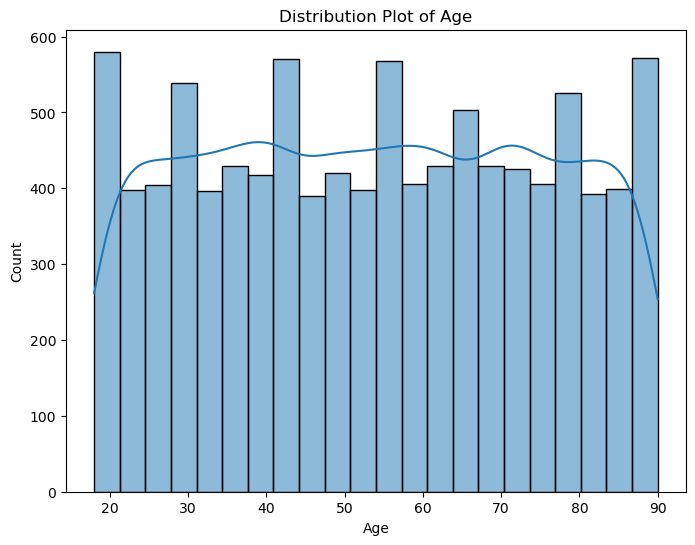

In [43]:
# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution Plot of Age')
plt.xlabel('Age')
plt.show()

Age is uniformly distributed.

**Skewness**

In [44]:
# Skewness
skewness = df['Age'].skew()

if skewness > 0:
    skewness_type = 'right-skewed'
elif skewness < 0:
    skewness_type = 'left-skewed'
else:
    skewness_type = 'approximately symmetric'

print(f"The distribution of 'Age' is {skewness_type} with skewness value: {skewness}")

The distribution of 'Age' is right-skewed with skewness value: 0.0047564445394951355


**Normality Test**

In [45]:
from scipy.stats import shapiro

# Shapiro-Wilk normality test
stat, p_value = shapiro(df['Age'])
print(f"\nShapiro-Wilk test for normality:")
print(f"Statistic: {stat}, p-value: {p_value}")
if p_value > 0.05:
    print("The distribution is approximately normal.")
else:
    print("The distribution is not normal.")


Shapiro-Wilk test for normality:
Statistic: 0.9550802111625671, p-value: 0.0
The distribution is not normal.


C:\Users\uzairmuh\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Box Plot**

<AxesSubplot:xlabel='Age'>

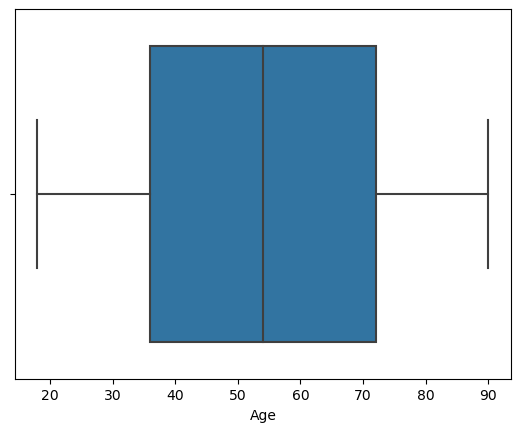

In [46]:
sns.boxplot(x=df['Age'])

<center>

### **`Gender` COLUMN**

In [47]:
df['Gender'].value_counts()

True     5029
False    4971
Name: Gender, dtype: int64

In [48]:
df_original['Gender'].value_counts()

Male      5029
Female    4971
Name: Gender, dtype: int64

**Distribution Plot**

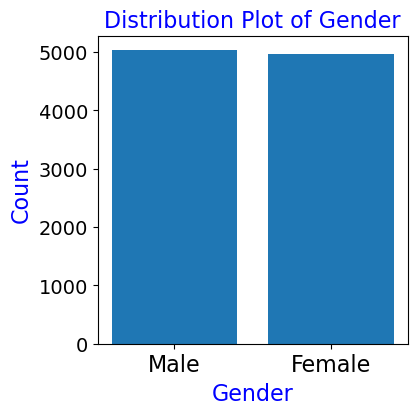

In [49]:
plt.figure(figsize=(4,4))
plt.bar(df_original['Gender'].value_counts().index,df_original['Gender'].value_counts())
plt.xticks(size=16)
plt.title("Distribution Plot of Gender", size=16 ,color='blue')
plt.xlabel("Gender", size=16, color='blue')
plt.ylabel("Count" , size=16, color='blue')
plt.yticks(size=14)
plt.show()

## **C.2 Bivariate Analysis**

**Average Age vs Glaucoma**

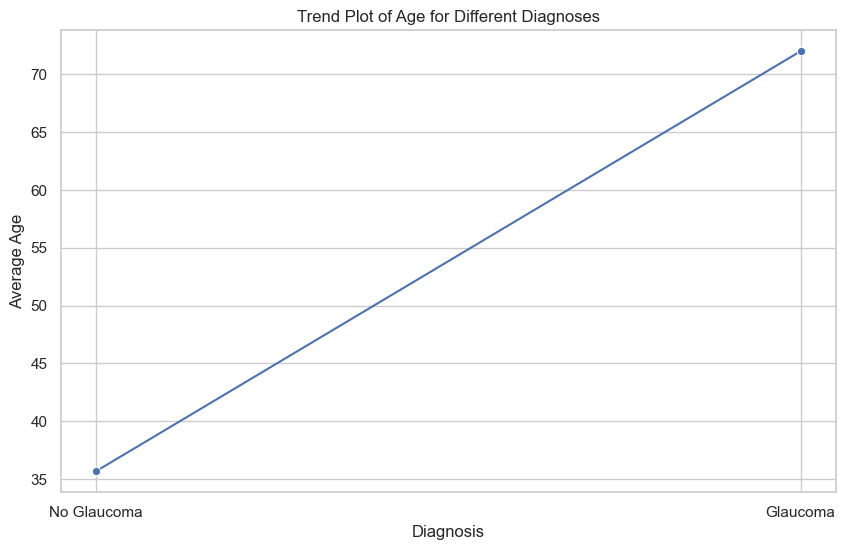

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


# set the style of seaborn (better aesthetics)
sns.set(style="whitegrid")

# trend plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Diagnosis', y='Age', data=df, marker='o', ci=None)

# plot labels and title
plt.title('Trend Plot of Age for Different Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Average Age')

plt.show()

**Count Plot of Diagnosis Frequency by Gender**

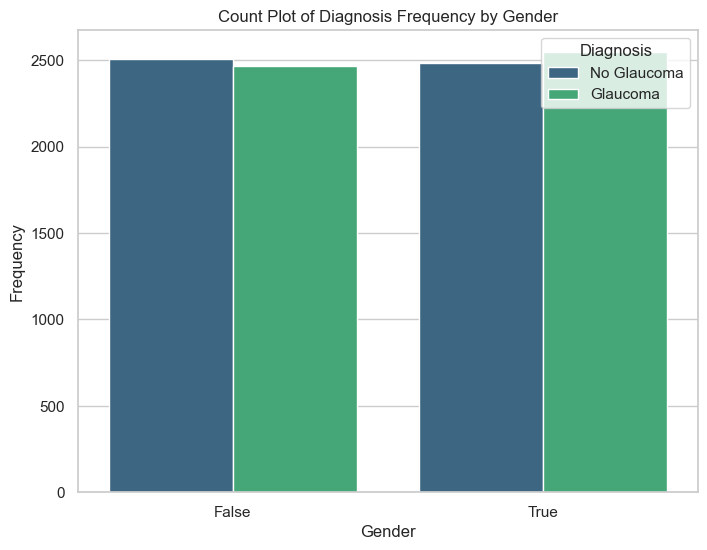

In [51]:
# set the style of seaborn (better aesthetics)
sns.set(style="whitegrid")

# count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Diagnosis', data=df, palette='viridis')

# plot labels and title
plt.title('Count Plot of Diagnosis Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Show legend
plt.legend(title='Diagnosis')

# Show the plot
plt.show()


## **C.3 Trivariate Analysis**

**Scatter Plot between Age and IOP for Different Diagnoses**

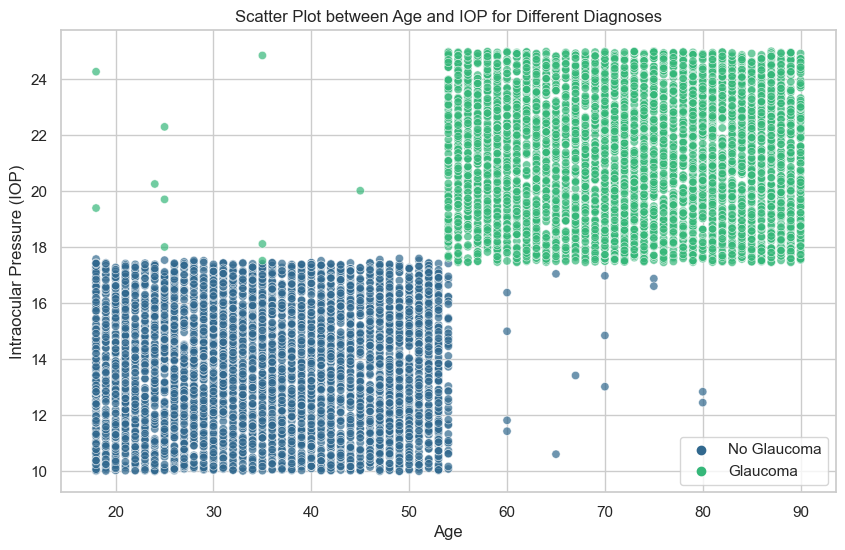

In [52]:
# style of seaborn for better aesthetics
sns.set(style="whitegrid")

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Intraocular Pressure (IOP)', hue='Diagnosis', data=df, palette='viridis', alpha=0.7)

# plot labels and title
plt.title('Scatter Plot between Age and IOP for Different Diagnoses')
plt.xlabel('Age')
plt.ylabel('Intraocular Pressure (IOP)')

# legend
plt.legend()

plt.show()

# E. PREPROCESSING

## **E.1 Discretization**

After discretizing a numerical column, we can use the resulting discrete values as categorical features in machine learning.

General outline of how we can use a discretized column in machine learning:

1. Perform Discretization
2. Feature Encoding
3. Use in Machine Learning

### Discretizing based on domain knowledge/natural groupings

**Discretization based on Binning**

'Low', 'Medium-Low', 'Medium-High', 'High'

10, 13.76

13.76, 17.485

17.485, 21.3

21.3, 25

In [53]:
df['Intraocular Pressure (IOP)'].describe()

count    10000.000000
mean        17.507527
std          4.356101
min         10.000000
25%         13.760000
50%         17.485000
75%         21.300000
max         25.000000
Name: Intraocular Pressure (IOP), dtype: float64

In [54]:
df['Intraocular Pressure (IOP)'] = np.where((df['Intraocular Pressure (IOP)'] <13.67) ,'Low',
                                np.where((df['Intraocular Pressure (IOP)'] >=13.67) & (df['Intraocular Pressure (IOP)'] <=17.485),'Medium-Low',
                               np.where((df['Intraocular Pressure (IOP)']>17.485) & (df['Intraocular Pressure (IOP)'] <=50),'Medium-High',
                                       'High')))

In [55]:
df[['Intraocular Pressure (IOP)']]

,Intraocular Pressure (IOP)
0,Low
1,Low
2,Medium-Low
3,Medium-Low
4,Low
...,...
9995,Medium-High
9996,Medium-High
9997,Medium-High
9998,Medium-High


**Discretization based on data distribution or quartiles**

In [56]:
df['Pachymetry'].describe()

count    10000.000000
mean       535.949048
std         36.615248
min        500.020000
25%        500.550000
50%        540.910000
75%        571.840000
max        599.990000
Name: Pachymetry, dtype: float64

In [57]:
Q1=df['Pachymetry'].quantile(0.25)
Q1

500.55

In [58]:
Q2=df['Pachymetry'].quantile(0.50)
Q2

540.91

In [59]:
Q3=df['Pachymetry'].quantile(0.75)
Q3

571.84

In [60]:
IQR=Q3-Q1
IQR

71.29000000000002

In [61]:
uw=Q3+1.5*IQR
lw=Q1-1.5*IQR
uw,lw

(678.7750000000001, 393.615)

In [62]:
Q1=df['Pachymetry'].quantile(0.25)
Q2=df['Pachymetry'].quantile(0.50)
Q3=df['Pachymetry'].quantile(0.75)
IQR=Q3-Q1
uw=Q3+1.5*IQR
lw=Q1-1.5*IQR

In [63]:
column='Pachymetry'
df[column]  = np.where((df[column]<lw) ,'lower_outlier',
                               np.where((df[column] >=lw) & (df[column] <=Q1),'low',
                               np.where((df[column]>Q1) & (df[column] <=Q2),'low_median',
                               np.where((df[column]>Q2) & (df[column] <=Q3),'high_median',
                               np.where((df[column]>Q3) & (df[column] <=Q3+1.5*IQR),'high',
                               'upper_outlier')))))

In [64]:
df[['Pachymetry']]

,Pachymetry
0,low_median
1,low_median
2,low_median
3,low_median
4,low_median
...,...
9995,high_median
9996,high_median
9997,high_median
9998,high_median


In [65]:
df.dtypes

Age                             int64
Gender                           bool
Intraocular Pressure (IOP)     object
Cup-to-Disc Ratio (CDR)       float64
Family History                   bool
Pachymetry                     object
Cataract Status                  bool
Angle Closure Status             bool
Diagnosis                      object
Glaucoma Type                  object
vam_20/20                       uint8
vam_20/40                       uint8
vam_LogMAR 0.0                  uint8
vam_LogMAR 0.1                  uint8
mh_Diabetes                     uint8
mh_Glaucoma in family           uint8
mh_Hypertension                 uint8
mh_None                         uint8
mu_No Medication                int32
mu_Amoxicillin                  int64
mu_Aspirin                      int64
mu_Atorvastatin                 int64
mu_Ibuprofen                    int64
mu_Lisinopril                   int64
mu_Metformin                    int64
mu_Omeprazole                   int64
vftr_sensiti

**Splitting Data**

Manually splitting data (function can also be used)

In [66]:
num_col = ['Age', 'Cup-to-Disc Ratio (CDR)', 'oct_retinal', 'oct_macular',  'oct_rnfl', 'oct_gcc']
cat_col =['Gender', 'Intraocular Pressure (IOP)', 'Pachymetry', 'Family History', 
       'Cataract Status', 'Angle Closure Status', 'Diagnosis', 'Glaucoma Type']
encoded_col = ['vam_20/20', 'vam_20/40', 'vam_LogMAR 0.0', 'vam_LogMAR 0.1',
       'mh_Diabetes', 'mh_Glaucoma in family', 'mh_Hypertension', 'mh_None',
       'mu_No Medication', 'mu_Amoxicillin', 'mu_Aspirin', 'mu_Atorvastatin',
       'mu_Ibuprofen', 'mu_Lisinopril', 'mu_Metformin', 'mu_Omeprazole',
       'vftr_sensitivity', 'vftr_specificity', 'vs_Blurred vision', 'vs_Eye pain',
       'vs_Halos around lights', 'vs_Nausea', 'vs_Redness in the eye',
       'vs_Tunnel vision', 'vs_Vision loss', 'vs_Vomiting']

In [67]:
# def data_splitter(data):
#     num_col=[]
#     cat_col=[]
#     for col in data.columns:
#         if ((data[col].dtype=='int64') or (data[col].dtype=='float64')):
#             num_col.append(col)
#         else:
#             cat_col.append(col)
#     num_data=data[num_col]
#     cat_data=data[cat_col]
    
#     return num_data,cat_data

In [68]:
df[num_col].head()

,Age,Cup-to-Disc Ratio (CDR),oct_retinal,oct_macular,oct_rnfl,oct_gcc
0,18,0.36,6.32,285.11,83.35,62.80
1,18,0.36,6.01,272.02,79.39,63.65
2,18,0.54,5.53,285.19,83.64,59.38
3,18,0.49,5.71,274.76,78.43,62.77
4,18,0.31,5.97,281.63,79.11,62.94


In [69]:
df[cat_col].head()

,Gender,Intraocular Pressure (IOP),Pachymetry,Family History,Cataract Status,Angle Closure Status,Diagnosis,Glaucoma Type
0,False,Low,low_median,True,False,False,No Glaucoma,No Glaucoma
1,False,Low,low_median,True,False,False,No Glaucoma,No Glaucoma
2,False,Medium-Low,low_median,True,False,True,No Glaucoma,No Glaucoma
3,False,Medium-Low,low_median,False,True,False,No Glaucoma,No Glaucoma
4,False,Low,low_median,True,True,False,No Glaucoma,No Glaucoma


In [70]:
df[encoded_col].head()

,vam_20/20,vam_20/40,vam_LogMAR 0.0,vam_LogMAR 0.1,mh_Diabetes,mh_Glaucoma in family,mh_Hypertension,mh_None,mu_No Medication,mu_Amoxicillin,...,vftr_sensitivity,vftr_specificity,vs_Blurred vision,vs_Eye pain,vs_Halos around lights,vs_Nausea,vs_Redness in the eye,vs_Tunnel vision,vs_Vision loss,vs_Vomiting
0,1,0,0,0,1,0,0,0,0,1,...,0.54,0.72,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,1,...,0.91,0.82,0,0,1,0,1,0,1,0
2,0,0,0,1,1,0,0,0,0,0,...,0.95,0.93,0,0,0,0,0,1,1,0
3,0,1,0,0,1,0,0,0,0,0,...,0.79,0.72,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,0.53,0.77,0,0,0,0,1,1,1,0


## E.2 Normalization

**ZScore Normalization**

In [71]:
df['Age'].value_counts()

18    175
70    164
59    163
42    161
55    161
     ... 
77    118
58    116
76    114
45    110
66    108
Name: Age, Length: 73, dtype: int64

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_norm=scaler.fit_transform(df[num_col]).round(2)

In [73]:
num_norm

array([[-1.7 , -1.31,  1.1 ,  1.16, -0.57,  0.07],
       [-1.7 , -1.31,  0.03, -0.35, -1.12,  0.26],
       [-1.7 , -0.06, -1.62,  1.17, -0.53, -0.72],
       ...,
       [ 1.71,  0.77, -0.  , -0.68, -0.48, -0.08],
       [ 1.71,  1.6 , -1.62,  1.26,  0.01,  1.42],
       [ 1.71,  0.63,  0.14, -1.31,  0.32, -1.6 ]])

In [74]:
df_num_norm=pd.DataFrame(num_norm, columns=df[num_col].columns)

In [75]:
df_num_norm

,Age,Cup-to-Disc Ratio (CDR),oct_retinal,oct_macular,oct_rnfl,oct_gcc
0,-1.70,-1.31,1.10,1.16,-0.57,0.07
1,-1.70,-1.31,0.03,-0.35,-1.12,0.26
2,-1.70,-0.06,-1.62,1.17,-0.53,-0.72
3,-1.70,-0.40,-1.00,-0.03,-1.25,0.06
4,-1.70,-1.65,-0.11,0.76,-1.16,0.10
...,...,...,...,...,...,...
9995,1.71,0.63,1.52,1.50,-1.41,-1.35
9996,1.71,0.77,-1.11,-1.43,0.83,0.23
9997,1.71,0.77,-0.00,-0.68,-0.48,-0.08
9998,1.71,1.60,-1.62,1.26,0.01,1.42


**Concat back to categorical data**

In [76]:
data = pd.concat([df_num_norm, df[cat_col], df[encoded_col]], axis=1)

In [77]:
data

,Age,Cup-to-Disc Ratio (CDR),oct_retinal,oct_macular,oct_rnfl,oct_gcc,Gender,Intraocular Pressure (IOP),Pachymetry,Family History,...,vftr_sensitivity,vftr_specificity,vs_Blurred vision,vs_Eye pain,vs_Halos around lights,vs_Nausea,vs_Redness in the eye,vs_Tunnel vision,vs_Vision loss,vs_Vomiting
0,-1.70,-1.31,1.10,1.16,-0.57,0.07,False,Low,low_median,True,...,0.54,0.72,0,0,1,0,0,0,1,0
1,-1.70,-1.31,0.03,-0.35,-1.12,0.26,False,Low,low_median,True,...,0.91,0.82,0,0,1,0,1,0,1,0
2,-1.70,-0.06,-1.62,1.17,-0.53,-0.72,False,Medium-Low,low_median,True,...,0.95,0.93,0,0,0,0,0,1,1,0
3,-1.70,-0.40,-1.00,-0.03,-1.25,0.06,False,Medium-Low,low_median,False,...,0.79,0.72,1,0,0,0,1,0,0,1
4,-1.70,-1.65,-0.11,0.76,-1.16,0.10,False,Low,low_median,True,...,0.53,0.77,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.71,0.63,1.52,1.50,-1.41,-1.35,False,Medium-High,high_median,False,...,0.92,0.97,0,1,0,0,0,0,1,0
9996,1.71,0.77,-1.11,-1.43,0.83,0.23,False,Medium-High,high_median,False,...,0.89,0.94,0,1,1,0,0,0,1,0
9997,1.71,0.77,-0.00,-0.68,-0.48,-0.08,True,Medium-High,high_median,True,...,0.81,0.76,0,0,1,1,0,0,1,0
9998,1.71,1.60,-1.62,1.26,0.01,1.42,False,Medium-High,high_median,False,...,0.73,0.89,0,0,1,0,0,0,0,1


In [78]:
data.dtypes

Age                           float64
Cup-to-Disc Ratio (CDR)       float64
oct_retinal                   float64
oct_macular                   float64
oct_rnfl                      float64
oct_gcc                       float64
Gender                           bool
Intraocular Pressure (IOP)     object
Pachymetry                     object
Family History                   bool
Cataract Status                  bool
Angle Closure Status             bool
Diagnosis                      object
Glaucoma Type                  object
vam_20/20                       uint8
vam_20/40                       uint8
vam_LogMAR 0.0                  uint8
vam_LogMAR 0.1                  uint8
mh_Diabetes                     uint8
mh_Glaucoma in family           uint8
mh_Hypertension                 uint8
mh_None                         uint8
mu_No Medication                int32
mu_Amoxicillin                  int64
mu_Aspirin                      int64
mu_Atorvastatin                 int64
mu_Ibuprofen

## E.3 Feature Encoding

**Dropping Multi Class Claddification Column**

In [79]:
data = data.drop('Glaucoma Type', axis=1)
data.head()

,Age,Cup-to-Disc Ratio (CDR),oct_retinal,oct_macular,oct_rnfl,oct_gcc,Gender,Intraocular Pressure (IOP),Pachymetry,Family History,...,vftr_sensitivity,vftr_specificity,vs_Blurred vision,vs_Eye pain,vs_Halos around lights,vs_Nausea,vs_Redness in the eye,vs_Tunnel vision,vs_Vision loss,vs_Vomiting
0,-1.7,-1.31,1.10,1.16,-0.57,0.07,False,Low,low_median,True,...,0.54,0.72,0,0,1,0,0,0,1,0
1,-1.7,-1.31,0.03,-0.35,-1.12,0.26,False,Low,low_median,True,...,0.91,0.82,0,0,1,0,1,0,1,0
2,-1.7,-0.06,-1.62,1.17,-0.53,-0.72,False,Medium-Low,low_median,True,...,0.95,0.93,0,0,0,0,0,1,1,0
3,-1.7,-0.40,-1.00,-0.03,-1.25,0.06,False,Medium-Low,low_median,False,...,0.79,0.72,1,0,0,0,1,0,0,1
4,-1.7,-1.65,-0.11,0.76,-1.16,0.10,False,Low,low_median,True,...,0.53,0.77,0,0,0,0,1,1,1,0


In [80]:
data['Diagnosis'].tail()

9995    Glaucoma
9996    Glaucoma
9997    Glaucoma
9998    Glaucoma
9999    Glaucoma
Name: Diagnosis, dtype: object

**Encoding feature**

In [81]:
#Mannual Encoding of class column

In [82]:
data['y']=np.where(data['Diagnosis']=='Glaucoma',1,0)

In [83]:
del data['Diagnosis']

In [84]:
data.head()

,Age,Cup-to-Disc Ratio (CDR),oct_retinal,oct_macular,oct_rnfl,oct_gcc,Gender,Intraocular Pressure (IOP),Pachymetry,Family History,...,vftr_specificity,vs_Blurred vision,vs_Eye pain,vs_Halos around lights,vs_Nausea,vs_Redness in the eye,vs_Tunnel vision,vs_Vision loss,vs_Vomiting,y
0,-1.7,-1.31,1.10,1.16,-0.57,0.07,False,Low,low_median,True,...,0.72,0,0,1,0,0,0,1,0,0
1,-1.7,-1.31,0.03,-0.35,-1.12,0.26,False,Low,low_median,True,...,0.82,0,0,1,0,1,0,1,0,0
2,-1.7,-0.06,-1.62,1.17,-0.53,-0.72,False,Medium-Low,low_median,True,...,0.93,0,0,0,0,0,1,1,0,0
3,-1.7,-0.40,-1.00,-0.03,-1.25,0.06,False,Medium-Low,low_median,False,...,0.72,1,0,0,0,1,0,0,1,0
4,-1.7,-1.65,-0.11,0.76,-1.16,0.10,False,Low,low_median,True,...,0.77,0,0,0,0,1,1,1,0,0


**One-Hot Encoding Descretized Columns**

In [85]:
df_dummies = pd.get_dummies(data)
df_dummies.head()

,Age,Cup-to-Disc Ratio (CDR),oct_retinal,oct_macular,oct_rnfl,oct_gcc,Gender,Family History,Cataract Status,Angle Closure Status,...,vs_Vision loss,vs_Vomiting,y,Intraocular Pressure (IOP)_Low,Intraocular Pressure (IOP)_Medium-High,Intraocular Pressure (IOP)_Medium-Low,Pachymetry_high,Pachymetry_high_median,Pachymetry_low,Pachymetry_low_median
0,-1.7,-1.31,1.10,1.16,-0.57,0.07,False,True,False,False,...,1,0,0,1,0,0,0,0,0,1
1,-1.7,-1.31,0.03,-0.35,-1.12,0.26,False,True,False,False,...,1,0,0,1,0,0,0,0,0,1
2,-1.7,-0.06,-1.62,1.17,-0.53,-0.72,False,True,False,True,...,1,0,0,0,0,1,0,0,0,1
3,-1.7,-0.40,-1.00,-0.03,-1.25,0.06,False,False,True,False,...,0,1,0,0,0,1,0,0,0,1
4,-1.7,-1.65,-0.11,0.76,-1.16,0.10,False,True,True,False,...,1,0,0,1,0,0,0,0,0,1


In [86]:
data.dtypes

Age                           float64
Cup-to-Disc Ratio (CDR)       float64
oct_retinal                   float64
oct_macular                   float64
oct_rnfl                      float64
oct_gcc                       float64
Gender                           bool
Intraocular Pressure (IOP)     object
Pachymetry                     object
Family History                   bool
Cataract Status                  bool
Angle Closure Status             bool
vam_20/20                       uint8
vam_20/40                       uint8
vam_LogMAR 0.0                  uint8
vam_LogMAR 0.1                  uint8
mh_Diabetes                     uint8
mh_Glaucoma in family           uint8
mh_Hypertension                 uint8
mh_None                         uint8
mu_No Medication                int32
mu_Amoxicillin                  int64
mu_Aspirin                      int64
mu_Atorvastatin                 int64
mu_Ibuprofen                    int64
mu_Lisinopril                   int64
mu_Metformin

## E.4 70:30 SPLIT

In [87]:
y = data['y'].values
X = data.drop(columns = ['y'])

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [89]:
X_train

,Age,Cup-to-Disc Ratio (CDR),oct_retinal,oct_macular,oct_rnfl,oct_gcc,Gender,Intraocular Pressure (IOP),Pachymetry,Family History,...,vftr_sensitivity,vftr_specificity,vs_Blurred vision,vs_Eye pain,vs_Halos around lights,vs_Nausea,vs_Redness in the eye,vs_Tunnel vision,vs_Vision loss,vs_Vomiting
803,-1.46,-1.37,1.58,1.71,1.07,0.91,True,Low,low,False,...,0.66,0.79,1,0,1,0,1,0,0,0
1387,-1.27,-0.06,-0.62,0.84,-0.15,-1.45,False,Medium-Low,low_median,False,...,0.52,0.88,1,0,0,0,0,0,1,1
921,-1.42,-0.06,-1.18,1.39,0.33,-1.38,False,Medium-Low,low_median,False,...,0.80,0.77,0,0,1,0,0,1,0,0
5917,0.34,1.33,1.62,0.49,-1.47,-1.30,True,Medium-High,high,True,...,0.86,0.89,0,0,1,0,1,0,0,1
9610,1.62,0.01,1.58,0.05,-1.56,-1.39,True,Medium-High,high,False,...,0.90,0.87,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,-1.51,-0.75,-0.14,1.69,-0.34,0.49,True,Medium-Low,low,False,...,0.66,0.72,0,0,1,0,0,1,0,0
5695,0.24,0.63,-0.83,1.01,-0.06,-1.54,True,Medium-High,high_median,True,...,0.75,0.89,0,0,1,0,1,0,0,1
8006,1.05,0.63,-1.73,-0.48,0.03,-0.41,True,Medium-High,high_median,True,...,0.86,0.86,1,0,1,0,0,0,0,1
1361,-1.27,-0.20,1.45,1.54,-0.93,1.08,False,Medium-Low,low,True,...,0.70,0.78,0,0,1,0,1,0,0,1


In [90]:
y_train

array([0, 0, 0, ..., 1, 0, 0])